In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE

In [9]:
seed = 42

In [10]:
dataset = np.load('../data/dataset.npz',)
X, y = dataset['X'], dataset['y']
print(X.shape, y.shape)

(9834, 400) (9834,)


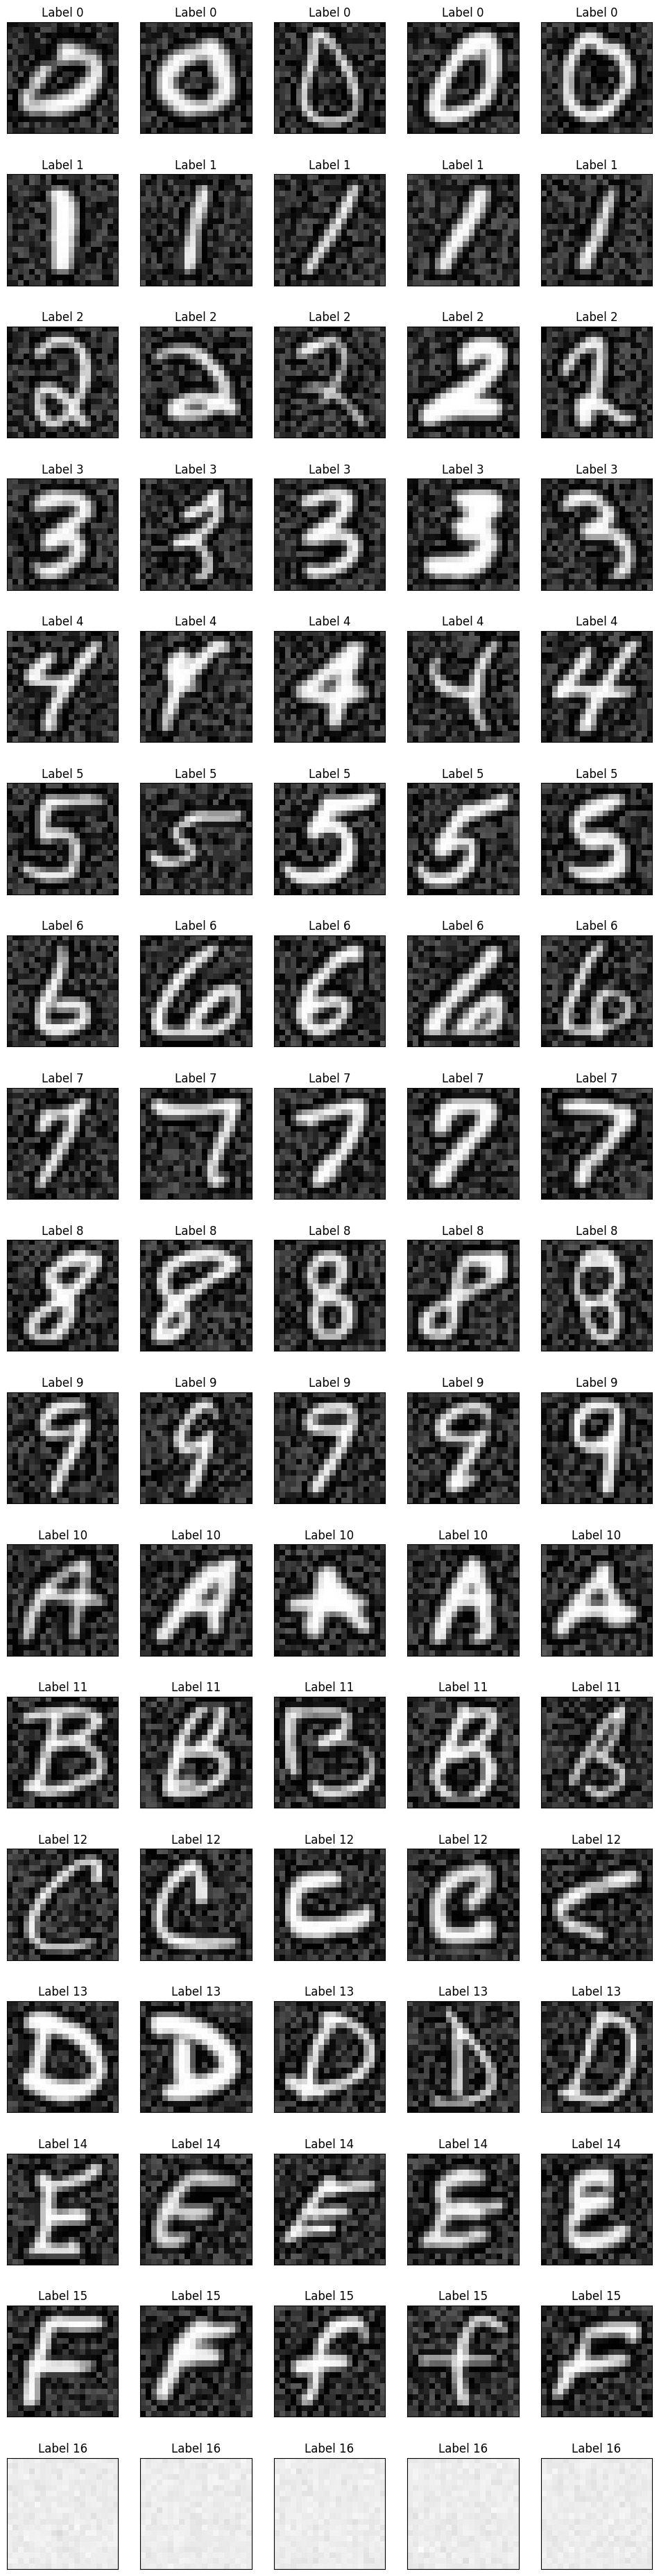

In [11]:
fig, axis = plt.subplots(17, 5, figsize=(12, 48))

for label in range(17):
    for i in range(5):
        axis[label, i].imshow(X[y == label][i+5].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
        axis[label, i].set_xticks([])
        axis[label, i].set_yticks([])
        axis[label, i].set_title(f'Label {label}')

plt.show()

In [12]:
for i in range(17):
    print(f'Label {i}: {len(X[y == i])}')

max([len(X[y == i]) for i in range(17)]) * 17


Label 0: 627
Label 1: 230
Label 2: 525
Label 3: 950
Label 4: 500
Label 5: 695
Label 6: 912
Label 7: 605
Label 8: 427
Label 9: 205
Label 10: 825
Label 11: 525
Label 12: 950
Label 13: 909
Label 14: 74
Label 15: 450
Label 16: 425


16150

#### SMOTE

(16150, 400) (16150,)


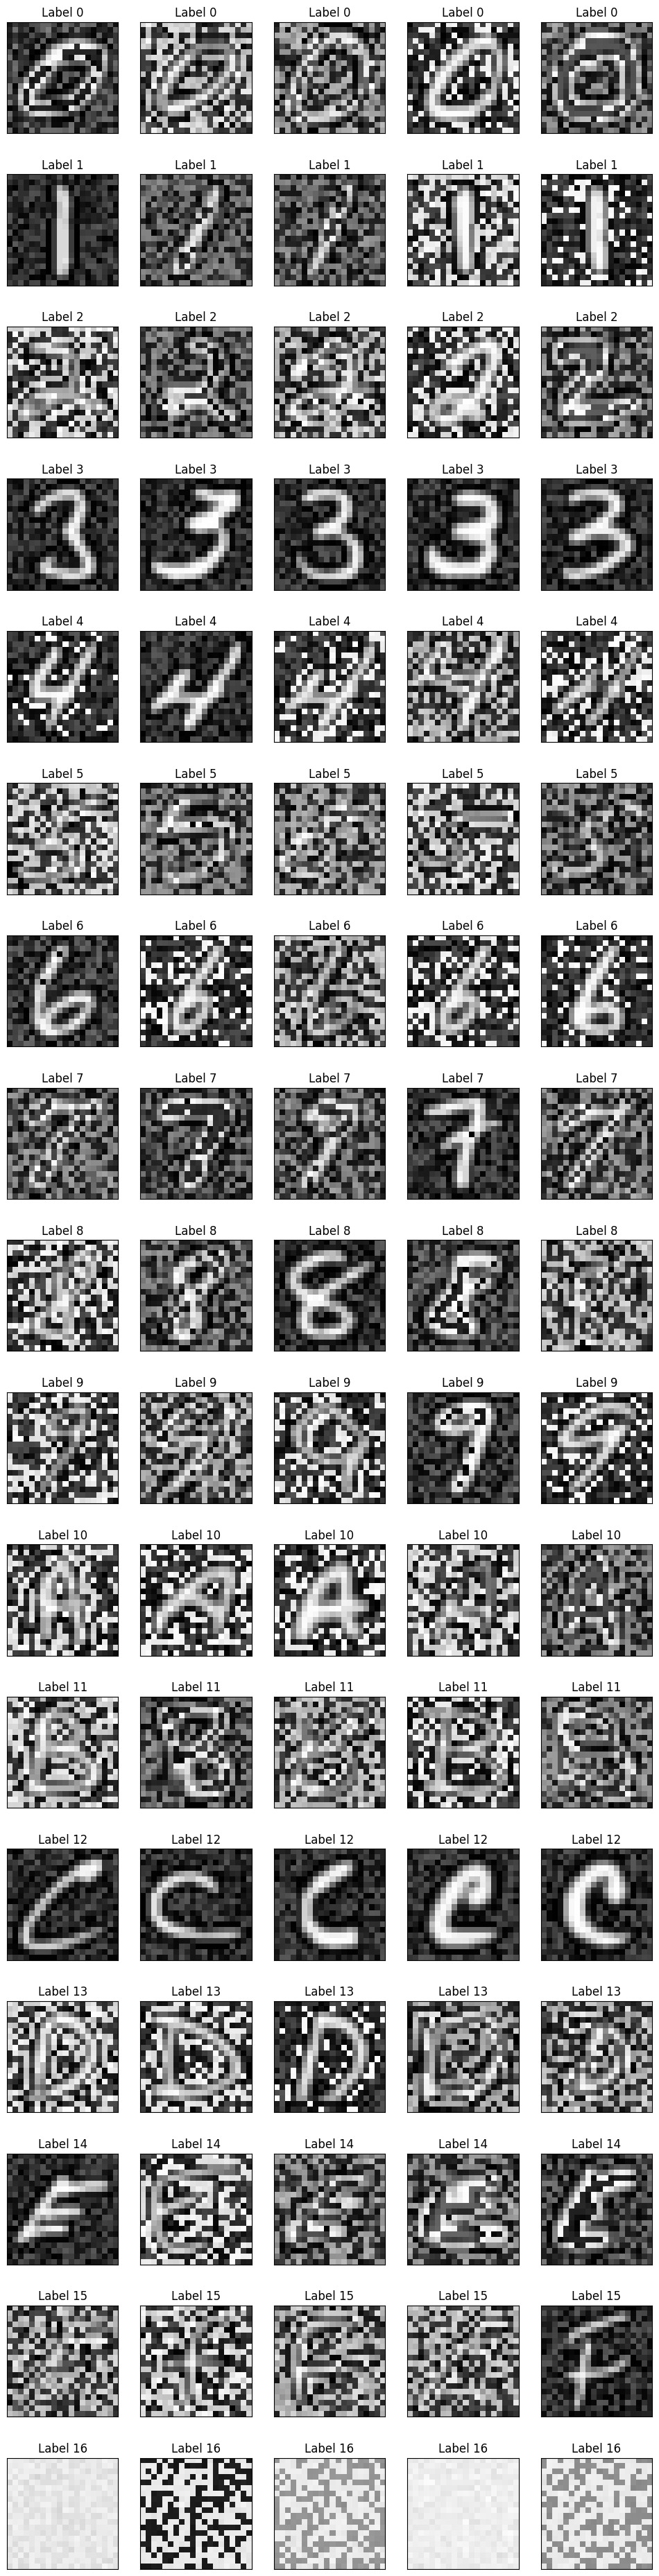

In [37]:
sm = SMOTE(random_state=seed, k_neighbors=2)
X_res, y_res = sm.fit_resample(X.reshape(X.shape[0], -1), y)
print(X_res.shape, y_res.shape)

fig, axis = plt.subplots(17, 5, figsize=(12, 48))
for label in range(17):
    for i in range(5):
        axis[label, i].imshow(X_res[y_res == label][949-i].reshape(20, 20), vmin=0, vmax=255, cmap='gray')
        axis[label, i].set_xticks([])
        axis[label, i].set_yticks([])
        axis[label, i].set_title(f'Label {label}')

plt.show()

In [41]:
datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift image horizontally by 20% of width
    height_shift_range=0.2, # Shift image vertically by 20% of height
    shear_range=0.2,        # Shear the image by 20%
    zoom_range=0.2,         # Zoom in/out by 20%
    fill_mode='nearest'     # Fill in missing pixels after transformations
)

# Load your image data (assuming X is your image data, y is your labels)
# X should be of shape (num_images, img_height, img_width, num_channels)
# y should be your labels corresponding to each image

# Generate augmented data on the fly
# This generates batches of augmented images and labels
augmented_images = []
augmented_labels = []

for X_batch, y_batch in datagen.flow(X, y, batch_size=32):
    augmented_images.append(X_batch)
    augmented_labels.append(y_batch)
    
    # We stop the loop after generating enough augmented images
    if len(augmented_images) > desired_num_augmented_images:
        break

# Now you have augmented images and labels in `augmented_images` and `augmented_labels`


TypeError: ImageDataGenerator.fit() got an unexpected keyword argument 'y'